In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE

from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import mean_absolute_error, root_mean_squared_error, r2_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import roc_curve, auc

from tqdm import tqdm
import warnings

from statsbombpy import sb

In [4]:
data = pd.read_csv("./data.csv")

In [5]:
data.shape

(9392, 59)

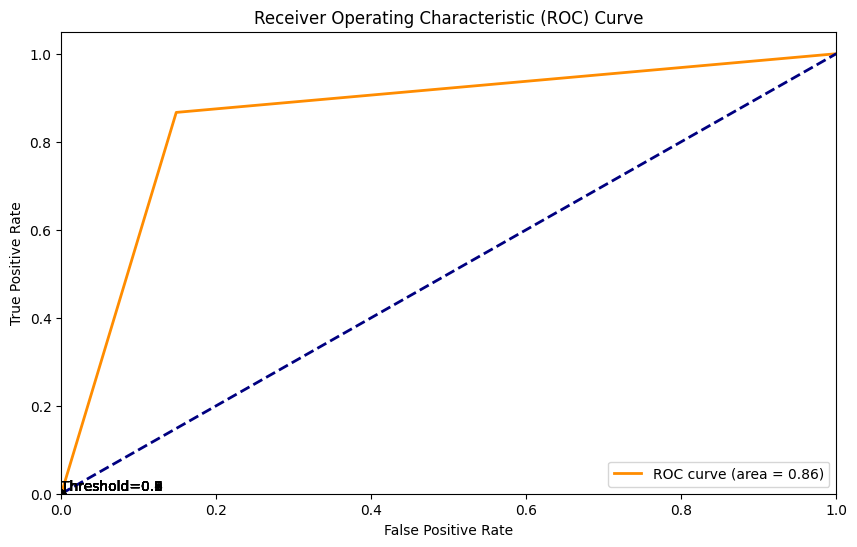

In [26]:
threshold = 0.5
X = data.drop("statsbomb_xg", axis=1)

Y = data["statsbomb_xg"]
# threshold = 0.5
Y = Y.apply(lambda x: x > (threshold/10))

scaler = StandardScaler().fit(X)
X = scaler.transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=20)

X_train, y_train = SMOTE().fit_resample(X_train, y_train)

clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

'''cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Not a goal", "Goal"])
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix DT')
plt.show()

print(f"\nDecision Tree {threshold/10}")
accuracy = accuracy_score(y_test, y_pred)
recision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1:", f1)'''

fpr, tpr, thresholds = roc_curve(y_test, clf.predict_proba(X_test)[:, 1])

# Plot ROC curve
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % auc(fpr, tpr))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")

# Add markers for thresholds from 0.1 to 0.9
for i in range(1, 10):
    threshold_index = np.argmax(thresholds >= i/10)
    plt.plot(fpr[threshold_index], tpr[threshold_index], 'ko')
    plt.text(fpr[threshold_index], tpr[threshold_index], f'Threshold={i/10}', fontsize=10, verticalalignment='bottom')

plt.show()
